In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
df=pd.read_csv("FIFA.csv")

In [4]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [5]:
# assigning dataframe to 'df' and droping unnecessary columns 
df = df.drop(columns=['Unnamed: 0', 'ID', 'Photo', 'Flag', 
                     'Club Logo', 'Real Face', 'Jersey Number', 
                     'Loaned From', 'Contract Valid Until', 'Release Clause'], axis=1)

In [6]:
df

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,Right,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,Right,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,Right,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,Right,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 79 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Position                    18147 non-null object
Joined                      16654 non-null object
Height                      18159 non-null

In [8]:
null_columns =df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Club                        241
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Skill Moves                  48
                           ... 
GKDiving                     48
GKHandling                   48
GKKicking                    48
GKPositioning                48
GKReflexes                   48
Length: 71, dtype: int64

In [9]:
null_columns=df.columns[df.isnull().any()]
print(null_columns)

Index(['Club', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')


In [10]:
df[['Club', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Joined', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']].replace('', np.nan, inplace=True)

C:\Users\Vishal Kotian\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [11]:
#Remove the Row where the value is Nan
df.dropna(subset=['Club', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Joined', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14751 entries, 0 to 18206
Data columns (total 79 columns):
Name                        14751 non-null object
Age                         14751 non-null int64
Nationality                 14751 non-null object
Overall                     14751 non-null int64
Potential                   14751 non-null int64
Club                        14751 non-null object
Value                       14751 non-null object
Wage                        14751 non-null object
Special                     14751 non-null int64
Preferred Foot              14751 non-null object
International Reputation    14751 non-null float64
Weak Foot                   14751 non-null float64
Skill Moves                 14751 non-null float64
Work Rate                   14751 non-null object
Body Type                   14751 non-null object
Position                    14751 non-null object
Joined                      14751 non-null object
Height                      14751 non-null

In [13]:
# Drop the column which are of no use
df.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14751 entries, 0 to 18206
Data columns (total 53 columns):
Name                        14751 non-null object
Age                         14751 non-null int64
Nationality                 14751 non-null object
Overall                     14751 non-null int64
Potential                   14751 non-null int64
Club                        14751 non-null object
Value                       14751 non-null object
Wage                        14751 non-null object
Special                     14751 non-null int64
Preferred Foot              14751 non-null object
International Reputation    14751 non-null float64
Weak Foot                   14751 non-null float64
Skill Moves                 14751 non-null float64
Work Rate                   14751 non-null object
Body Type                   14751 non-null object
Position                    14751 non-null object
Joined                      14751 non-null object
Height                      14751 non-null

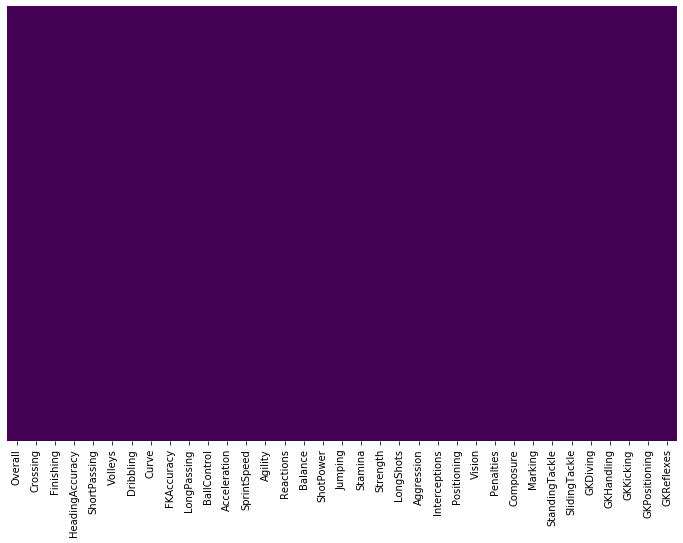

In [15]:

# To Get the Heat map 
plt.figure(figsize=(12,8))
sns.heatmap(df[['Overall', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

In [16]:
# assigning dataframe to 'df' and droping unnecessary columns 
df = df.drop(columns=['Name', 'Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot',
       'Work Rate', 'Body Type', 'Joined', 'Height', 'Weight'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14751 entries, 0 to 18206
Data columns (total 42 columns):
Age                         14751 non-null int64
Overall                     14751 non-null int64
Potential                   14751 non-null int64
Special                     14751 non-null int64
International Reputation    14751 non-null float64
Weak Foot                   14751 non-null float64
Skill Moves                 14751 non-null float64
Position                    14751 non-null object
Crossing                    14751 non-null float64
Finishing                   14751 non-null float64
HeadingAccuracy             14751 non-null float64
ShortPassing                14751 non-null float64
Volleys                     14751 non-null float64
Dribbling                   14751 non-null float64
Curve                       14751 non-null float64
FKAccuracy                  14751 non-null float64
LongPassing                 14751 non-null float64
BallControl                 14751

In [18]:
# To get the object type of particular datatype
df.select_dtypes(include='float').columns

Index(['International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [19]:
# For getting the corealation matrix to take the overall performance
df.corr()['Overall'].sort_values(ascending=False)

Overall                     1.000000
Reactions                   0.851576
Composure                   0.806372
Special                     0.799473
ShortPassing                0.726746
BallControl                 0.722560
Potential                   0.653456
LongPassing                 0.592894
ShotPower                   0.565339
Vision                      0.530021
Dribbling                   0.518126
Skill Moves                 0.506625
International Reputation    0.505888
Curve                       0.504522
LongShots                   0.503088
Crossing                    0.501262
HeadingAccuracy             0.473380
Stamina                     0.467991
Aggression                  0.464158
Age                         0.463233
FKAccuracy                  0.459281
Volleys                     0.450665
Positioning                 0.440587
Penalties                   0.393219
Finishing                   0.374637
Strength                    0.348397
Interceptions               0.345273
M

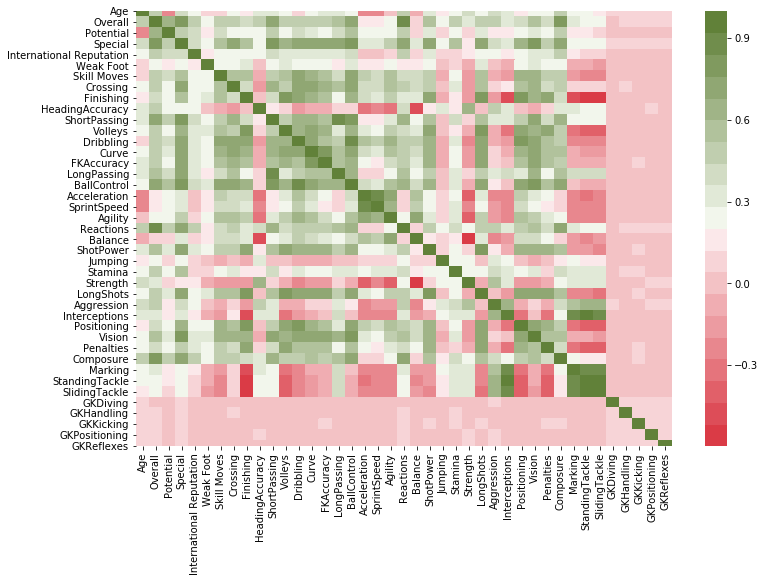

In [20]:
# as we can see in the graph below there are plenty of properties that correlate. 
# In order to avoid collinearity we have to exclude one from correlating pair 
# (except when high (>.8) correlation appears with target feature this case 'Overall')
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap=sns.diverging_palette(10, 110, n=20))
plt.show()

In [21]:
# Putting feature variable to X
X = df.drop(['Overall','Position'],axis=1)
# Putting response variable to y
y = df.Overall

In [22]:
# Random state is the seed used by  the random number generator. It can be any interger
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=.30 , random_state=10)

In [23]:
X_train

,Age,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
14813,30,60,1598,1.0,3.0,2.0,60.0,48.0,47.0,58.0,...,43.0,45.0,62.0,60.0,58.0,9.0,11.0,16.0,6.0,7.0
695,30,79,1864,3.0,3.0,3.0,64.0,84.0,79.0,65.0,...,74.0,79.0,21.0,29.0,25.0,14.0,12.0,9.0,12.0,11.0
16664,18,74,1359,1.0,3.0,3.0,31.0,60.0,58.0,48.0,...,68.0,45.0,16.0,15.0,13.0,11.0,12.0,10.0,8.0,6.0
13485,26,62,1548,1.0,3.0,2.0,39.0,37.0,64.0,54.0,...,39.0,42.0,48.0,62.0,59.0,10.0,7.0,10.0,6.0,11.0
9631,27,66,1710,1.0,4.0,4.0,69.0,68.0,49.0,56.0,...,67.0,59.0,43.0,26.0,24.0,10.0,13.0,12.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14234,28,61,1628,1.0,3.0,2.0,62.0,49.0,57.0,60.0,...,37.0,65.0,56.0,60.0,62.0,15.0,8.0,6.0,14.0,15.0
1589,26,76,1767,1.0,3.0,3.0,37.0,80.0,78.0,62.0,...,72.0,69.0,37.0,25.0,19.0,10.0,6.0,9.0,13.0,11.0
15691,21,68,1479,1.0,2.0,2.0,52.0,35.0,45.0,46.0,...,44.0,51.0,55.0,64.0,62.0,9.0,10.0,8.0,6.0,6.0
8874,21,80,1756,1.0,3.0,3.0,54.0,71.0,60.0,63.0,...,76.0,55.0,34.0,39.0,41.0,7.0,14.0,8.0,11.0,10.0


In [24]:
y_train

14813    60
695      79
16664    57
13485    62
9631     66
         ..
14234    61
1589     75
15691    59
8874     66
1525     76
Name: Overall, Length: 4425, dtype: int64

In [25]:
X_test

,Age,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
15808,23,66,1380,1.0,3.0,2.0,25.0,64.0,61.0,37.0,...,60.0,47.0,12.0,18.0,17.0,14.0,11.0,11.0,7.0,12.0
15147,19,72,1461,1.0,3.0,3.0,58.0,41.0,38.0,56.0,...,48.0,53.0,15.0,31.0,39.0,6.0,10.0,7.0,11.0,14.0
6372,25,72,1477,1.0,3.0,2.0,32.0,30.0,69.0,57.0,...,47.0,61.0,67.0,69.0,67.0,8.0,7.0,15.0,8.0,11.0
13817,18,80,1609,1.0,3.0,2.0,62.0,44.0,63.0,56.0,...,36.0,54.0,62.0,64.0,60.0,12.0,5.0,14.0,7.0,10.0
8087,21,80,1634,1.0,3.0,3.0,45.0,67.0,65.0,57.0,...,61.0,69.0,16.0,16.0,31.0,10.0,9.0,15.0,13.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,29,72,1698,2.0,3.0,3.0,52.0,75.0,72.0,71.0,...,71.0,73.0,27.0,39.0,13.0,11.0,13.0,11.0,8.0,16.0
15698,23,68,1505,1.0,3.0,2.0,59.0,48.0,36.0,58.0,...,49.0,43.0,28.0,32.0,29.0,10.0,6.0,12.0,13.0,12.0
11237,29,64,1863,1.0,2.0,3.0,68.0,63.0,52.0,64.0,...,59.0,55.0,51.0,63.0,60.0,8.0,15.0,8.0,9.0,9.0
1746,26,75,1761,1.0,3.0,2.0,62.0,43.0,72.0,64.0,...,66.0,69.0,77.0,75.0,76.0,12.0,11.0,10.0,11.0,7.0


In [26]:
y_test

15808    59
15147    60
6372     69
13817    62
8087     67
         ..
3636     72
15698    59
11237    64
1746     75
8782     66
Name: Overall, Length: 10326, dtype: int64

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression

In [29]:
# Fit the model 
lr1=LinearRegression().fit(X_train,y_train)

In [30]:
# Print the intercept
print(lr1.intercept_)

-12.737775820500815


In [31]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lr1.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Age,0.498612
Potential,0.470974
Special,0.031291
International Reputation,0.510586
Weak Foot,0.035333
Skill Moves,0.858209
Crossing,-0.025450
Finishing,-0.012685
HeadingAccuracy,0.017332
ShortPassing,0.015938


In [32]:
# Making Prediction using model
y_pred = lr1.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error , r2_score
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)

In [34]:
print("Value of the mean square value is ",mse)
print("Value of the r Square is ", r_squared)

Value of the mean square value is  3.3174100511531672
Value of the r Square is  0.9298179005592321


In [35]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant.
X_train_sm = sm.add_constant(X_train_sm)
# create a fitting model in one time
lm_1=sm.OLS(y_train,X_train_sm).fit()

C:\Users\Vishal Kotian\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [36]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1466.
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:39:25   Log-Likelihood:                -8943.1
No. Observations:                4425   AIC:                         1.797e+04
Df Residuals:                    4384   BIC:                         1.823e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -12.7378      0.629    -20.246      0.000     -13.971     -11.504
Age                          0.4986      0.011     44.114      0.000       0.476       0.521
Potential                    0.4710      0.009     54.045      0.000       0.454       0.488
Special                      0.0313      0.013      2.422      0.015       0.006       0.057
International Reputation     0.5106      0.084      6.096      0.000       0.346       0.675
Weak Foot                    0.0353      0.047      0.759      0.448      -0.056       0.127
Skill Moves                  0.8582      0.071     12.080      0.000       0.719       0.997
Crossing                    -0.0255      0.013     -1.896      0.058      -0.052       0.001
Finishing                   -0.0127      0.014     -0.927      0.354      -0.040       0.014
HeadingAccuracy              0.0173      0.013      1.289      0.197      -0.009       0.044
ShortPassing                 0.0159      0.015      1.079      0.281      -0.013       0.045
Volleys                     -0.0409      0.014     -3.020      0.003      -0.067      -0.014
Dribbling                   -0.0374      0.014     -2.646      0.008      -0.065      -0.010
Curve                       -0.0388      0.013     -2.879      0.004      -0.065      -0.012
FKAccuracy                  -0.0234      0.013     -1.746      0.081      -0.050       0.003
LongPassing                 -0.0361      0.014     -2.590      0.010      -0.063      -0.009
BallControl                  0.0653      0.015      4.298      0.000       0.036       0.095
Acceleration                -0.0008      0.014     -0.056      0.955      -0.029       0.027
SprintSpeed                 -0.0006      0.014     -0.041      0.967      -0.028       0.027
Agility                     -0.0326      0.014     -2.391      0.017      -0.059      -0.006
Reactions                    0.1207      0.014      8.475      0.000       0.093       0.149
Balance                     -0.0539      0.013     -4.009      0.000      -0.080      -0.028
ShotPower                   -0.0222      0.014     -1.635      0.102      -0.049       0.004
Jumping                     -0.0260      0.013     -1.965      0.049      -0.052   -5.97e-05
Stamina                     -0.0022      0.013     -0.168      0.867      -0.028       0.024
Strength                   5.68e-05      0.013      0.004      0.997      -0.026       0.026
LongShots                   -0.0368      0.014     -2.719      0.007      -0.063      -0.010
Aggression                  -0.0332      0.013     -2.492      0.013      -0.059      -0.007
Interceptions               -0.0290      0.014     -2.120      0.034      -0.056      -0.002
Positioning                 -0.0549      0.014     -4.000      0.000      -0.082      -0.028
Vision        

In [37]:
df.columns

Index(['Age', 'Overall', 'Potential', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Position', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [42]:
# Putting feature variable to X
X = df.drop(['Overall','Position','Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],axis=1)
# Putting response variable to y
y = df.Overall

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=.30 , random_state=10)

In [44]:
X_train

,Age,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
14813,30,60,1598,1.0,3.0,2.0,60.0,48.0,47.0,58.0,...,49.0,59.0,66.0,65.0,52.0,59.0,55.0,54.0,53.0,43.0
695,30,79,1864,3.0,3.0,3.0,64.0,84.0,79.0,65.0,...,75.0,83.0,66.0,53.0,66.0,59.0,26.0,86.0,70.0,74.0
16664,18,74,1359,1.0,3.0,3.0,31.0,60.0,58.0,48.0,...,52.0,63.0,50.0,55.0,55.0,27.0,13.0,58.0,50.0,68.0
13485,26,62,1548,1.0,3.0,2.0,39.0,37.0,64.0,54.0,...,51.0,71.0,83.0,85.0,53.0,73.0,56.0,30.0,44.0,39.0
9631,27,66,1710,1.0,4.0,4.0,69.0,68.0,49.0,56.0,...,70.0,47.0,75.0,55.0,62.0,51.0,26.0,64.0,58.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14234,28,61,1628,1.0,3.0,2.0,62.0,49.0,57.0,60.0,...,56.0,70.0,66.0,64.0,47.0,62.0,57.0,54.0,48.0,37.0
1589,26,76,1767,1.0,3.0,3.0,37.0,80.0,78.0,62.0,...,78.0,82.0,69.0,73.0,73.0,51.0,28.0,74.0,62.0,72.0
15691,21,68,1479,1.0,2.0,2.0,52.0,35.0,45.0,46.0,...,48.0,62.0,64.0,48.0,32.0,52.0,56.0,52.0,42.0,44.0
8874,21,80,1756,1.0,3.0,3.0,54.0,71.0,60.0,63.0,...,66.0,70.0,51.0,56.0,66.0,41.0,18.0,62.0,68.0,76.0


In [47]:
y_train

14813    60
695      79
16664    57
13485    62
9631     66
         ..
14234    61
1589     75
15691    59
8874     66
1525     76
Name: Overall, Length: 4425, dtype: int64

In [45]:
from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
regressor = LinearRegression

In [50]:
regressor1 =LinearRegression().fit(X_train,y_train)

In [52]:
print(regressor1.intercept_)

-14.316581529674139


In [54]:
coeff_df = pd.DataFrame(regressor1.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Age,0.530639
Potential,0.492886
Special,0.006156
International Reputation,0.518758
Weak Foot,0.052502
Skill Moves,0.944878
Crossing,-0.002509
Finishing,0.012249
HeadingAccuracy,0.042449
ShortPassing,0.041095


In [55]:
y_pred = regressor1.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error , r2_score
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)

In [57]:
print("Value of the mean square value is ",mse)
print("Value of the r Square is ", r_squared)

Value of the mean square value is  3.431082824515318
Value of the r Square is  0.9274130745772775


In [58]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant.
X_train_sm = sm.add_constant(X_train_sm)
# create a fitting model in one time
regressor_1=sm.OLS(y_train,X_train_sm).fit()

C:\Users\Vishal Kotian\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [59]:
regressor_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1838.
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        03:23:21   Log-Likelihood:                -9006.7
No. Observations:                4425   AIC:                         1.808e+04
Df Residuals:                    4393   BIC:                         1.828e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -14.3166      0.597    -23.962      0.000     -15.488     -13.145
Age                          0.5306      0.011     48.118      0.000       0.509       0.552
Potential                    0.4929      0.009     57.571      0.000       0.476       0.510
Special                      0.0062      0.001      4.143      0.000       0.003       0.009
International Reputation     0.5188      0.084      6.142      0.000       0.353       0.684
Weak Foot                    0.0525      0.047      1.114      0.265      -0.040       0.145
Skill Moves                  0.9449      0.071     13.247      0.000       0.805       1.085
Crossing                    -0.0025      0.004     -0.590      0.556      -0.011       0.006
Finishing                    0.0122      0.005      2.653      0.008       0.003       0.021
HeadingAccuracy              0.0424      0.004      9.624      0.000       0.034       0.051
ShortPassing                 0.0411      0.008      5.442      0.000       0.026       0.056
Volleys                     -0.0124      0.004     -3.034      0.002      -0.020      -0.004
Dribbling                   -0.0158      0.006     -2.533      0.011      -0.028      -0.004
Curve                       -0.0127      0.004     -2.975      0.003      -0.021      -0.004
FKAccuracy                   0.0023      0.004      0.597      0.550      -0.005       0.010
LongPassing                 -0.0084      0.005     -1.542      0.123      -0.019       0.002
BallControl                  0.1011      0.008     12.915      0.000       0.086       0.116
Acceleration                 0.0229      0.006      3.897      0.000       0.011       0.034
SprintSpeed                  0.0241      0.005      4.454      0.000       0.014       0.035
Agility                     -0.0066      0.005     -1.441      0.150      -0.016       0.002
Reactions                    0.1566      0.006     25.347      0.000       0.145       0.169
Balance                     -0.0291      0.004     -6.925      0.000      -0.037      -0.021
ShotPower                    0.0045      0.004      1.026      0.305      -0.004       0.013
Jumping                     -0.0004      0.003     -0.113      0.910      -0.007       0.006
Stamina                      0.0237      0.004      6.218      0.000       0.016       0.031
Strength                     0.0291      0.004      7.221      0.000       0.021       0.037
LongShots                   -0.0129      0.005     -2.844      0.004      -0.022      -0.004
Aggression                  -0.0075      0.004     -2.118      0.034      -0.014      -0.001
Interceptions               -0.0054      0.005     -0.998      0.318      -0.016       0.005
Positioning                 -0.0299      0.005     -6.632      0.000      -0.039      -0.021
Vision        